In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to images and masks directories
image_dir = "D://Mybean//mysridata//mysri//images"
mask_dir = "D://Mybean//mysridata//mysri//masks"

# Image and mask data generators
image_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)

image_generator = image_datagen.flow_from_directory(
    image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(128, 128),
    batch_size=32,
    seed=42
)

mask_generator = mask_datagen.flow_from_directory(
    mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(128, 128),
    batch_size=32,
    seed=42
)

# Combine generators into one which yields image and mask
train_generator = zip(image_generator, mask_generator)


Found 40 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

def build_fcnn():
    inputs = Input((128, 128, 3))

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Decoder
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    up1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3)

    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4)

    outputs = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(up2)

    model = Model(inputs, outputs)
    return model

model = build_fcnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584

In [3]:
# Train the FCNN model
model.fit(train_generator, steps_per_epoch=50, epochs=50)


Epoch 1/50
50/50 [==============================] - 65s 1s/step - loss: 0.4604 - accuracy: 0.7401
Epoch 2/50
50/50 [==============================] - 70s 1s/step - loss: 0.2791 - accuracy: 0.8697
Epoch 3/50
50/50 [==============================] - 75s 1s/step - loss: 0.2515 - accuracy: 0.8834
Epoch 4/50
50/50 [==============================] - 70s 1s/step - loss: 0.2155 - accuracy: 0.8990
Epoch 5/50
50/50 [==============================] - 67s 1s/step - loss: 0.1908 - accuracy: 0.9087
Epoch 6/50
50/50 [==============================] - 70s 1s/step - loss: 0.1768 - accuracy: 0.9143
Epoch 7/50
50/50 [==============================] - 70s 1s/step - loss: 0.1604 - accuracy: 0.9209
Epoch 8/50
50/50 [==============================] - 62s 1s/step - loss: 0.1435 - accuracy: 0.9286
Epoch 9/50
50/50 [==============================] - 64s 1s/step - loss: 0.1505 - accuracy: 0.9250
Epoch 10/50
50/50 [==============================] - 65s 1s/step - loss: 0.1305 - accuracy: 0.9342
Epoch 11/50
50/50 [

1/1 [==============================] - 0s 313ms/step


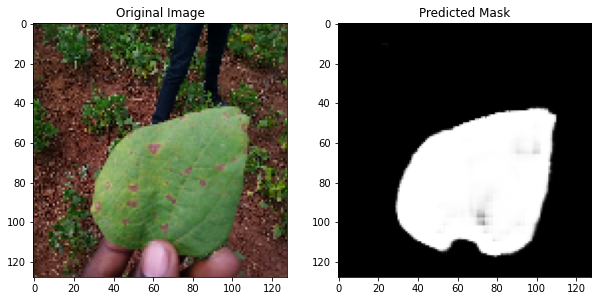

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sample image for prediction
sample_image = image_generator[0][0]
predicted_mask = model.predict(np.expand_dims(sample_image, axis=0))[0]

# Display the original image and predicted mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image)

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask.squeeze(), cmap='gray')

plt.show()
